# Playground

In [41]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("./code")

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

import logging
logging.basicConfig(format="%(asctime)s - %(levelname)s: %(message)s", level=logging.INFO, datefmt="%I:%M:%S")

from dataset import *
from plots import *
from models import *
from utils import *

fix_seed()

## Metadata Summary

In [7]:
metadata = load_metadata()

In [4]:
metadata.head()

,Unnamed: 0,Multi_Cell_Image_Id,Multi_Cell_Image_Name,Single_Cell_Image_Id,Single_Cell_Image_Name,TableNumber,ImageNumber,Image_FileName_DAPI,Image_PathName_DAPI,Image_FileName_Tubulin,Image_PathName_Tubulin,Image_FileName_Actin,Image_PathName_Actin,Image_Metadata_Plate_DAPI,Image_Metadata_Well_DAPI,Replicate,Image_Metadata_Compound,Image_Metadata_Concentration,moa
0,0,433,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,0,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,0,1,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,Week10_40111,Week10_200907_B02_s1_w2D492FCE4-15C2-4C66-99A5...,Week10_40111,Week10_200907_B02_s1_w436D0A3BC-098D-4271-B5AA...,Week10_40111,Week10_40111,B02,1,DMSO,0.0,DMSO
1,1,433,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,1,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,0,1,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,Week10_40111,Week10_200907_B02_s1_w2D492FCE4-15C2-4C66-99A5...,Week10_40111,Week10_200907_B02_s1_w436D0A3BC-098D-4271-B5AA...,Week10_40111,Week10_40111,B02,1,DMSO,0.0,DMSO
2,2,433,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,2,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,0,1,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,Week10_40111,Week10_200907_B02_s1_w2D492FCE4-15C2-4C66-99A5...,Week10_40111,Week10_200907_B02_s1_w436D0A3BC-098D-4271-B5AA...,Week10_40111,Week10_40111,B02,1,DMSO,0.0,DMSO
3,3,433,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,3,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,0,1,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,Week10_40111,Week10_200907_B02_s1_w2D492FCE4-15C2-4C66-99A5...,Week10_40111,Week10_200907_B02_s1_w436D0A3BC-098D-4271-B5AA...,Week10_40111,Week10_40111,B02,1,DMSO,0.0,DMSO
4,4,433,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,4,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,0,1,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,Week10_40111,Week10_200907_B02_s1_w2D492FCE4-15C2-4C66-99A5...,Week10_40111,Week10_200907_B02_s1_w436D0A3BC-098D-4271-B5AA...,Week10_40111,Week10_40111,B02,1,DMSO,0.0,DMSO


In [5]:
metadata.shape

(488396, 19)

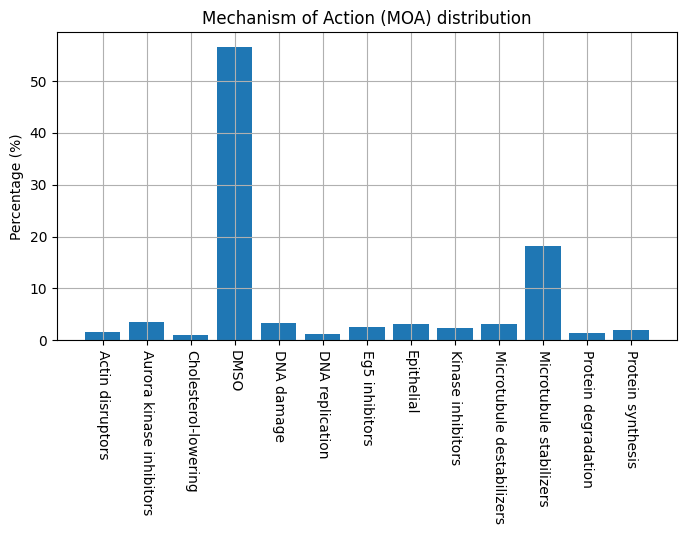

In [6]:
plot_MOA_distribution(metadata)

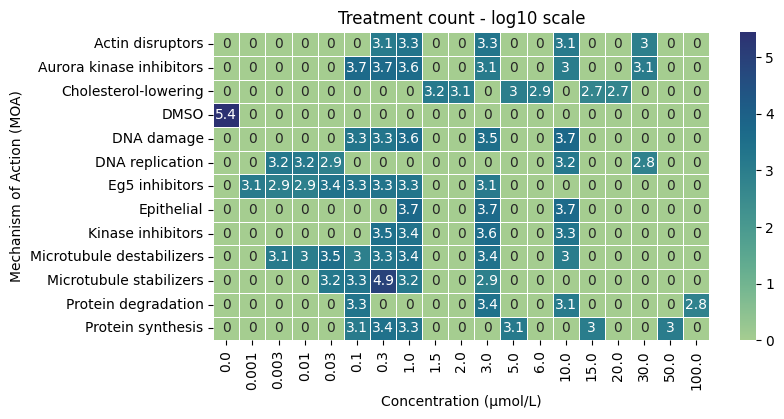

In [7]:
plot_treatment_heatmap(metadata)

## Tiny - Subset of Dataset

In [8]:
tiny_metadata = metadata[metadata["Multi_Cell_Image_Name"] == "Week10_200907_F02_s1_w14631241C-4FA2-4BC9-8693-D7D268CAEE82"]
#tiny_metadata = metadata[metadata["Multi_Cell_Image_Name"] == "B02_s1_w16F89C55C-7808-4136-82E4-E066F8E3CB10"]

tiny_images = load_images_from_metadata(tiny_metadata)
print(f"{tiny_metadata.shape[0]} images")

40 images


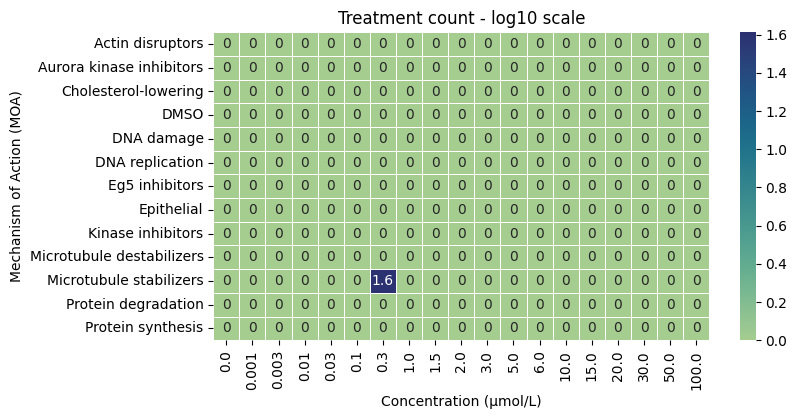

In [9]:
plot_treatment_heatmap(tiny_metadata)

## Stratified - Subset of Dataset

In [10]:
blacklist = [("Eg5 inhibitors", 0.1), ("Microtubule destabilizers", 0.3), ("Cholesterol-lowering", 6.0)]
stratified_metadata = stratify_metadata(metadata, 60, blacklist=blacklist)

stratified_images = load_images_from_metadata(stratified_metadata)
print(f"{stratified_images.shape[0]} images")

3780 images


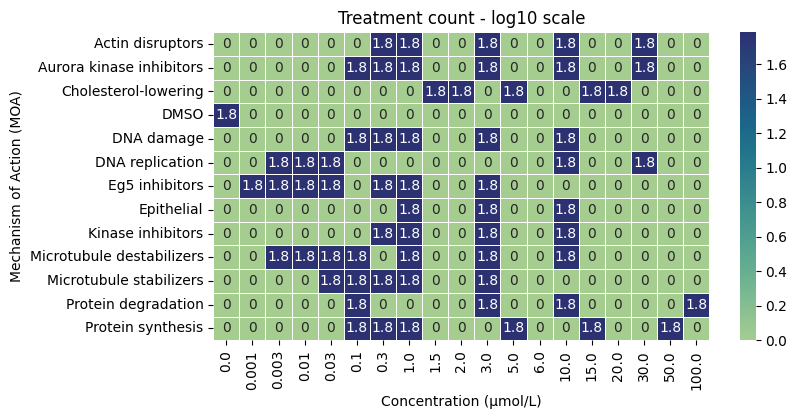

In [11]:
plot_treatment_heatmap(stratified_metadata)

## Model - Training

In [12]:
train_images = tiny_images
train_metadata = tiny_metadata

train_images = normalize_image_channel_wise(train_images)

In [13]:
img1 = train_images[0]

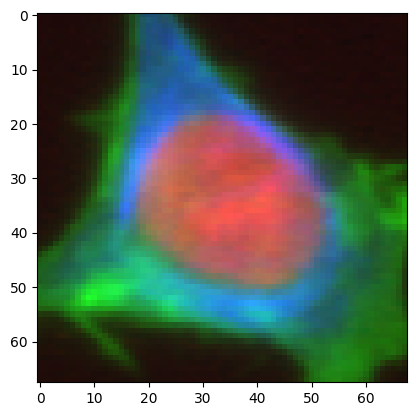

In [14]:
plot_image(img1)

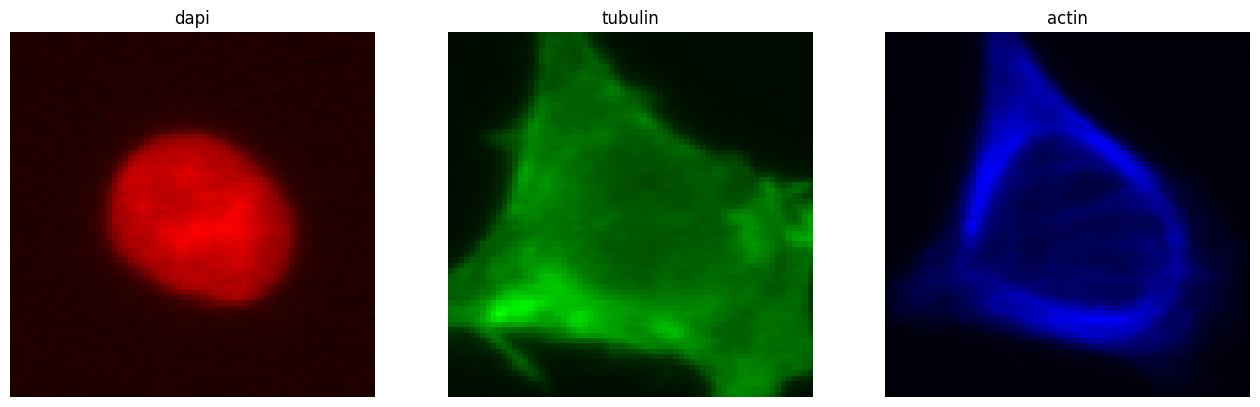

In [15]:
plot_channels(img1)

In [16]:
train_images = normalized_to_pseudo_zscore(train_images)
train_images = crop_images(train_images)

In [ ]:
train_conditional_diffusion_model(train_metadata, train_images, epochs=40, epoch_sample_times=2, batch_size=2)

03:31:47 - INFO: Using device: cpu
03:31:47 - INFO: Starting epoch 1:
 40%|███████████████████████████████████████████████████▏                                                                            | 8/20 [00:13<00:19,  1.65s/it, MSE=1.01]

## Model - Load pretrained

In [ ]:
unet = UNet()
unet.load_state_dict(torch.load("./models/DDPM_Unconditional/ckpt.pt"))
diffusion = Diffusion()
sampled_images = diffusion.sample(unet, N_images=1)

## Results

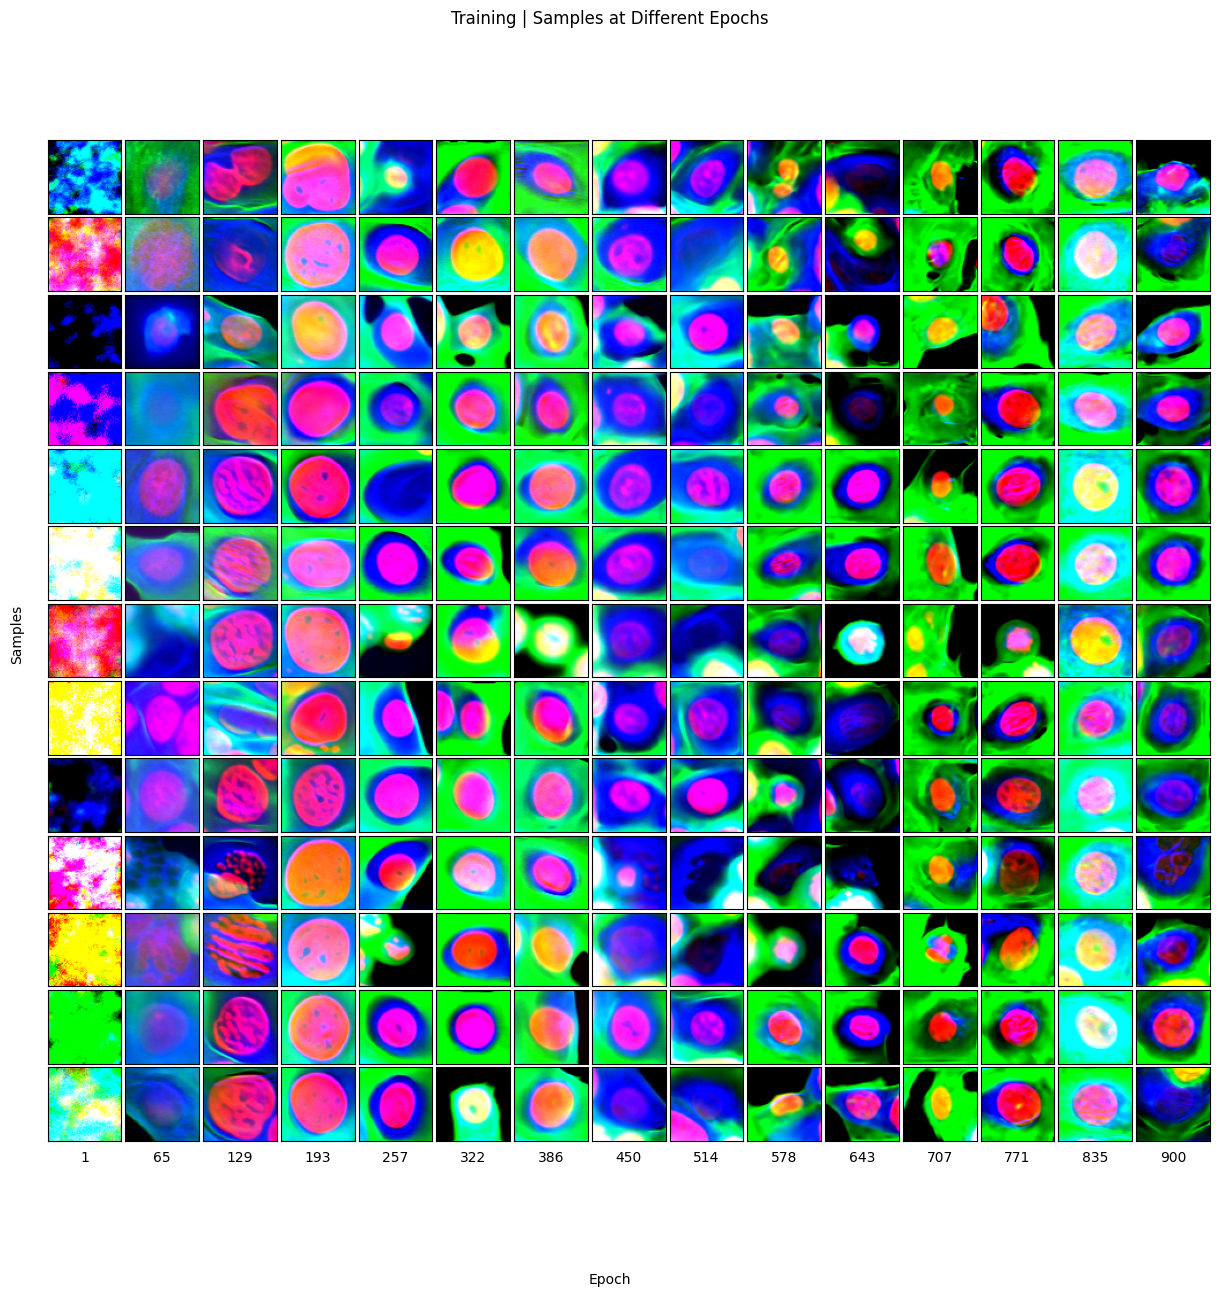

In [3]:
epoch_images, epochs = load_epoch_images("./results/DDPM_Conditional/")
plot_epoch_sample_series(epoch_images, epochs)

In [ ]:
plot_image(epoch_images[-1][0])

## Misc

In [14]:
model = Treatment_classifier()

In [15]:
img = torch.rand(3, 64, 64)
model(torch.cat([img[None], img[None]], dim=0))

(tensor([[-0.0297, -0.0273, -0.0227,  0.0157,  0.0422,  0.0352, -0.0016,  0.0246,
           0.0106,  0.0367, -0.0269,  0.0199,  0.0120],
         [-0.0297, -0.0273, -0.0227,  0.0157,  0.0422,  0.0352, -0.0016,  0.0246,
           0.0106,  0.0367, -0.0269,  0.0199,  0.0120]],
        grad_fn=<AddmmBackward0>),
 tensor([[-0.0145],
         [-0.0145]], grad_fn=<AddmmBackward0>))

In [58]:
blacklist = []
validation_metadata = stratify_metadata(metadata, 20, blacklist=blacklist)
train_metadata = stratify_metadata(metadata, 80, blacklist=blacklist).drop(validation_metadata.index, errors="ignore")
train_metadata.shape

(3960, 19)

In [59]:
18480/32*600

346500.0

In [60]:
4000/16*900

225000.0

In [18]:
blacklist = []
validation_metadata = stratify_metadata(metadata, 20, blacklist=blacklist)
train_metadata = stratify_metadata(metadata, 320, blacklist=blacklist).drop(validation_metadata.index, errors="ignore")

_train_images = load_images_from_metadata(train_metadata)
_train_images = normalize_image_channel_wise(_train_images)
_train_images = normalized_to_pseudo_zscore(_train_images)
train_images = crop_images(_train_images)

_validation_images = load_images_from_metadata(validation_metadata)
_validation_images = normalize_image_channel_wise(_validation_images)
_validation_images = normalized_to_pseudo_zscore(_validation_images)
validation_images = crop_images(_validation_images)

train_classifier(train_metadata, train_images, validation_metadata, validation_images)

11:38:37 - INFO: Using device: cpu
11:38:37 - INFO: Starting epoch 1:
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 619/619 [00:42<00:00, 14.67it/s, loss=2.25]
11:39:20 - INFO: Starting epoch 2:
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 619/619 [00:38<00:00, 16.11it/s, loss=2.59]
11:39:59 - INFO: Starting epoch 3:
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 619/619 [00:37<00:00, 16.54it/s, loss=2.16]
11:40:36 - INFO: Starting epoch 4:
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 619/619 [00:38<00:00, 16.25it/s, loss=1.15]
11:41:14 - INFO: Starting epoch 5:
100%|█████████████████████████████████████████████████████████████████████████████████████

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 619/619 [00:40<00:00, 15.24it/s, loss=0.65]
12:03:12 - INFO: Starting epoch 40:
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 619/619 [00:40<00:00, 15.31it/s, loss=0.696]
12:03:52 - INFO: Starting epoch 41:
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 619/619 [00:41<00:00, 14.98it/s, loss=0.46]
12:04:34 - INFO: Starting epoch 42:
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 619/619 [00:40<00:00, 15.43it/s, loss=0.498]
12:05:14 - INFO: Starting epoch 43:
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 619/619 [00:40<00:00, 15.4

## Treatment Classifier Results

In [10]:
classifier_training_data = load_dict("results/Classifier/train_results.pkl")

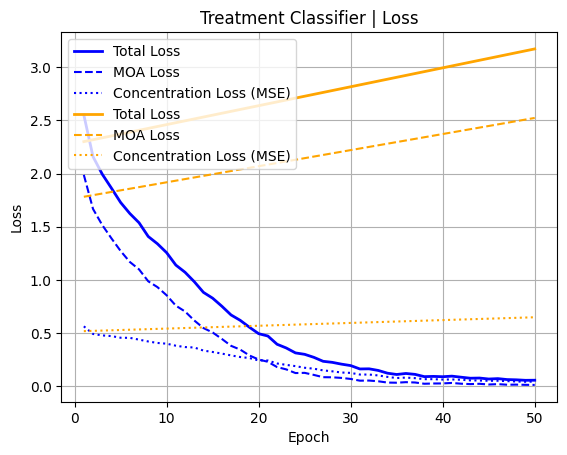

In [11]:
plot_treatment_classifier_loss(classifier_training_data)

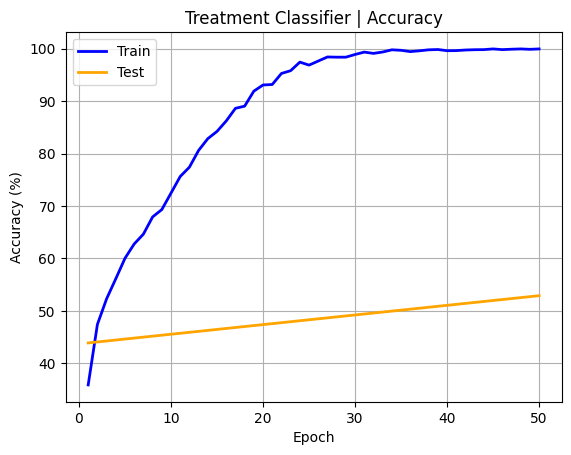

In [12]:
plot_treatment_classifier_accuracy(classifier_training_data)

# Evaluation

In [ ]:
n_classes = len(get_all_MOA_types())
unet = UNet_conditional(n_classes)
unet.load_state_dict(torch.load("./models/DDPM_Conditional/ckpt1.pt", map_location=torch.device('cpu')))
diffusion = Diffusion_conditional()

classifier = Treatment_classifier2()
classifier.load_state_dict(torch.load("./models/Classifier/ckpt.pt"))

In [ ]:
N_images = 2

labels = torch.zeros(N_images, dtype=torch.long)

# compute mean and std
concentrations = torch.tensor(np.array(metadata["Image_Metadata_Concentration"], dtype=np.float32))
concentrations = log_transform(concentrations)
concentration_mean, concentration_std = concentrations.mean(), concentrations.std()

concentrations = torch.ones((N_images, 1))
concentrations = (concentrations / concentration_mean) / concentration_std
y_regr = log_transform(concentrations)

sampled_images = diffusion.sample(unet, N_images=N_images, labels=labels, y_regr=y_regr)

In [ ]:
sampled_images

In [ ]:
pred_moa, _ = classifier(sampled_images)
#pred_moa, _ = classifier(train_images[:N_images])

pred_moa = pred_moa.max(1)[1]

In [ ]:
accuracy = (torch.sum(pred_moa == labels)).numpy() / N_images
accuracy

## MOA

In [49]:
class MOA_classifier(nn.Module): 
    def __init__(self, c_in=3, N_moas=13):
        super().__init__()
        
        self.bulk = nn.Sequential(
            nn.Conv2d(in_channels=c_in, out_channels=32, kernel_size=5, padding=2),
            # 64h * 64w * 32ch
            nn.MaxPool2d(2),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),

            # 32h * 32w * 32ch
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding=0),
            # 28h * 28w * 32ch
            nn.MaxPool2d(2),
            # 14h * 14w * 32ch
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),

            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding=0),
            # 10h * 10w * 32ch
            nn.MaxPool2d(2),
            # 5h * 5w * 32ch
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),

            #  5h * 5w * 32ch
            nn.Conv2d(in_channels=32, out_channels=2*256, kernel_size=5, padding=0),
            # 1h * 1w * 512ch
            nn.BatchNorm2d(2*256),
            nn.Flatten()
        )
        
        bulk_outs = 2*256
        
        self.moa_out = nn.Sequential(
            nn.Linear(bulk_outs, 16),
            nn.Tanh(),
            nn.Linear(16, N_moas))
        
    def forward(self, images):
        x = self.bulk(images)
        y_moa = self.moa_out(x)
        return y_moa

In [52]:
def train_MOA_classifier(train_metadata, train_images, validation_metadata, validation_images, lr=0.01, epochs=50, batch_size=32, epoch_sample_times=10):
    run_name = "MOA_Classifier"
    make_result_folders(run_name)
    
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    logging.info(f"Using device: {device}")
    
    # prepare train dataset
    moa_to_id, _ = get_MOA_mappings()
    train_moa = torch.from_numpy(np.array([moa_to_id[m] for m in train_metadata["moa"]]))

    train_dataset = TensorDataset(train_images, train_moa)
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # prepare validation set
    moa_to_id, _ = get_MOA_mappings()
    validation_moa = torch.from_numpy(np.array([moa_to_id[m] for m in validation_metadata["moa"]]))

    validation_dataset = TensorDataset(validation_images, validation_moa)
    validation_dataloader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)

    training_result = {}
    
    moa_loss = nn.CrossEntropyLoss()
    
    model = MOA_classifier().to(device)
    
    training_result["train_loss"] = []      # (epoch, loss)
    training_result["validation_loss"] = [] # (epoch, loss)
    training_result["train_accuracy"] = []      # (epoch, accuracy)
    training_result["validation_accuracy"] = [] # (epoch, accuracy)
    
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=1e-5)
    
    k = 0
    epoch_sample_points = torch.linspace(1, epochs, epoch_sample_times, dtype=torch.int32)
    
    for epoch in range(1, epochs+1):
        logging.info(f"Starting epoch {epoch}:")
        
        train_batch_loss = []
        train_batch_accuracy = []

        pbar = tqdm(train_dataloader)
        for i, (images, target_moa) in enumerate(pbar):
            images = images.to(device)
            target_moa = target_moa.to(device)

            pred_moa = model(images)
            loss = moa_loss(pred_moa, target_moa)

            optimizer.zero_grad()
            loss.backward()
            #torch.nn.utils.clip_grad_norm_(model.parameters(), 1_000)
            optimizer.step()
            
            train_batch_loss.append(loss.detach().cpu())
            
            accuracy = (torch.sum(pred_moa.max(1)[1] == target_moa)).cpu().numpy() / len(images)
            train_batch_accuracy.append(accuracy)     
                
            pbar.set_postfix(loss=loss.item())

        # store training loss
        training_result["train_loss"].append((epoch, np.mean(np.array(train_batch_loss))))
        training_result["train_accuracy"].append((epoch, np.mean(np.array(train_batch_accuracy))))
        
        if epoch == epoch_sample_points[k]:
            k += 1
            
            with torch.no_grad():
                model.eval()
                
                validation_batch_loss = []
                validation_batch_accuracy = []
        
                for i, (images, target_moa) in enumerate(validation_dataloader):
                    images = images.to(device)
                    target_moa = target_moa.to(device)

                    pred_moa = model(images)
                    loss = moa_loss(pred_moa, target_moa)
                    
                    validation_batch_loss.append(loss.detach().cpu())
               
                    accuracy = (torch.sum(pred_moa.max(1)[1] == target_moa)).cpu().numpy() / len(images)
                    validation_batch_accuracy.append(accuracy)     
            
                training_result["validation_loss"].append((epoch, np.mean(np.array(validation_batch_loss))))
                training_result["validation_accuracy"].append((epoch, np.mean(np.array(validation_batch_accuracy))))

                model.train()
            
            # store latest model and performance
            logging.info("saving")
            torch.save(model.state_dict(), os.path.join("models", run_name, f"ckpt{epoch}.pt"))
            save_dict(training_result, os.path.join("results", run_name, "train_results.pkl"))  

    torch.save(model.state_dict(), os.path.join("models", run_name, f"ckpt.pt"))

In [53]:
blacklist = []
validation_metadata = stratify_metadata(metadata, 20, blacklist=blacklist)
train_metadata = stratify_metadata(metadata, 120, blacklist=blacklist).drop(validation_metadata.index, errors="ignore")

_train_images = load_images_from_metadata(train_metadata)
_train_images = normalize_image_channel_wise(_train_images)
_train_images = normalized_to_pseudo_zscore(_train_images)
train_images = crop_images(_train_images)

_validation_images = load_images_from_metadata(validation_metadata)
_validation_images = normalize_image_channel_wise(_validation_images)
_validation_images = normalized_to_pseudo_zscore(_validation_images)
validation_images = crop_images(_validation_images)

train_MOA_classifier(train_metadata, train_images, validation_metadata, validation_images)

02:27:17 - INFO: Using device: cpu
02:27:17 - INFO: Starting epoch 1:
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 207/207 [00:14<00:00, 14.42it/s, loss=2.29]
02:27:33 - INFO: saving
02:27:33 - INFO: Starting epoch 2:
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 207/207 [00:15<00:00, 13.79it/s, loss=2.15]
02:27:48 - INFO: Starting epoch 3:
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 207/207 [00:14<00:00, 13.84it/s, loss=1.71]
02:28:03 - INFO: Starting epoch 4:
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 207/207 [00:15<00:00, 13.21it/s, loss=2.02]
02:28:18 - INFO: Starting epoch 5:
100%|█████████████████████████████████████████████████████████████

In [38]:
classifier_training_data = load_dict("results/MOA_Classifier/train_results.pkl")

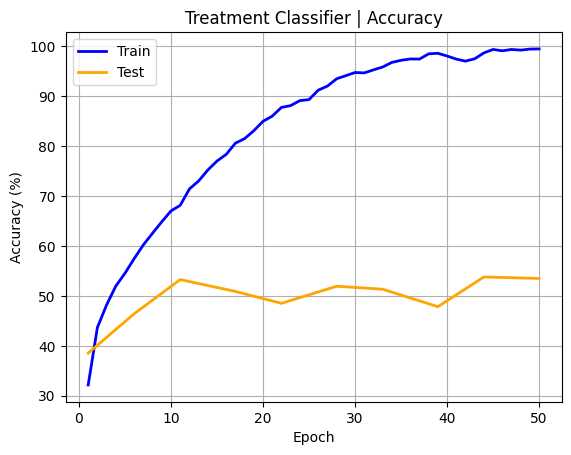

In [39]:
plot_treatment_classifier_accuracy(classifier_training_data)

## Regression

In [37]:
class Concentration_Regressor(nn.Module): 
    def __init__(self, c_in=3, N_moas=13):
        super().__init__()
        
        self.bulk = nn.Sequential(
            nn.Conv2d(in_channels=c_in, out_channels=32, kernel_size=5, padding=2),
            # 64h * 64w * 32ch
            nn.MaxPool2d(2),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),

            # 32h * 32w * 32ch
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding=0),
            # 28h * 28w * 32ch
            nn.MaxPool2d(2),
            # 14h * 14w * 32ch
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),

            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding=0),
            # 10h * 10w * 32ch
            nn.MaxPool2d(2),
            # 5h * 5w * 32ch
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),

            #  5h * 5w * 32ch
            nn.Conv2d(in_channels=32, out_channels=2*256, kernel_size=5, padding=0),
            # 1h * 1w * 512ch
            nn.BatchNorm2d(2*256),
            nn.Flatten()
        )
        
        bulk_outs = 2*256
        
        self.concentration_out = nn.Sequential(
            nn.Linear(bulk_outs, 16),
            nn.Tanh(),
            nn.Linear(16, 1))
        
    def forward(self, images):
        x = self.bulk(images)
        y = self.concentration_out(x)
        return y

In [ ]:
def train_concentration_regressor(train_metadata, train_images, validation_metadata, validation_images, lr=0.01, epochs=50, batch_size=32, epoch_sample_times=10):
    run_name = "Concentration_regressor"
    make_result_folders(run_name)
    
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    logging.info(f"Using device: {device}")
    
    # prepare train dataset
    moa_to_id, _ = get_MOA_mappings()
    train_moa = torch.from_numpy(np.array([moa_to_id[m] for m in train_metadata["moa"]]))

    train_dataset = TensorDataset(train_images, train_moa)
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # prepare validation set
    moa_to_id, _ = get_MOA_mappings()
    validation_moa = torch.from_numpy(np.array([moa_to_id[m] for m in validation_metadata["moa"]]))

    validation_dataset = TensorDataset(validation_images, validation_moa)
    validation_dataloader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=True)

    training_result = {}
    
    concentration_loss = nn.MSELoss()
    
    model = MOA_classifier().lto(device)
    
    training_result["train_loss"] = []      # (epoch, loss)
    training_result["validation_loss"] = [] # (epoch, loss)
    training_result["train_accuracy"] = []      # (epoch, accuracy)
    training_result["validation_accuracy"] = [] # (epoch, accuracy)
    
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=1e-5)
    
    k = 0
    epoch_sample_points = torch.linspace(1, epochs, epoch_sample_times, dtype=torch.int32)
    
    for epoch in range(1, epochs+1):
        logging.info(f"Starting epoch {epoch}:")
        
        train_batch_loss = []
        train_batch_accuracy = []

        pbar = tqdm(train_dataloader)
        for i, (images, target_moa) in enumerate(pbar):
            images = images.to(device)
            target_moa = target_moa.to(device)

            pred_moa = model(images)
            loss = moa_loss(pred_moa, target_moa)

            optimizer.zero_grad()
            loss.backward()
            #torch.nn.utils.clip_grad_norm_(model.parameters(), 1_000)
            optimizer.step()
            
            train_batch_loss.append(loss.detach().cpu())
            
            accuracy = (torch.sum(pred_moa.max(1)[1] == target_moa)).cpu().numpy() / len(images)
            train_batch_accuracy.append(accuracy)     
                
            pbar.set_postfix(loss=loss.item())

        # store training loss
        training_result["train_loss"].append((epoch, np.mean(np.array(train_batch_loss))))
        training_result["train_accuracy"].append((epoch, np.mean(np.array(train_batch_accuracy))))
        
        if epoch == epoch_sample_points[k]:
            k += 1
            
            with torch.no_grad():
                model.eval()
                
                validation_batch_loss = []
                validation_batch_accuracy = []
        
                for i, (images, target_moa) in enumerate(validation_dataloader):
                    images = images.to(device)
                    target_moa = target_moa.to(device)

                    pred_moa = model(images)
                    loss = moa_loss(pred_moa, target_moa)
                    
                    validation_batch_loss.append(loss.detach().cpu())
               
                    accuracy = (torch.sum(pred_moa.max(1)[1] == target_moa)).cpu().numpy() / len(images)
                    validation_batch_accuracy.append(accuracy)     
            
                training_result["validation_loss"].append((epoch, np.mean(np.array(validation_batch_loss))))
                training_result["validation_accuracy"].append((epoch, np.mean(np.array(validation_batch_accuracy))))

                model.train()
            
            # store latest model and performance
            torch.save(model.state_dict(), os.path.join("models", run_name, f"ckpt.pt"))
            save_dict(training_result, os.path.join("results", run_name, "train_results.pkl"))  


# VAE

In [44]:
import numpy as np
from torch import nn, Tensor
import torch
from typing import List, Set, Dict, Tuple, Optional, Any

class CytoVariationalAutoencoder(nn.Module):
 
    def __init__(self, input_shape, latent_features: int):
        super(CytoVariationalAutoencoder, self).__init__()
        
        self.input_shape = input_shape
        self.latent_features = latent_features
        self.observation_features = np.prod(input_shape)
        self.observation_shape = input_shape
        self.input_channels = input_shape[0]
        
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=self.input_channels, out_channels=32, kernel_size=5, padding=2),
            nn.MaxPool2d(2),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),

            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding=0),
            nn.MaxPool2d(2),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),

            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding=0),
            nn.MaxPool2d(2),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),

            nn.Conv2d(in_channels=32, out_channels=2*self.latent_features, kernel_size=5, padding=0),
            nn.BatchNorm2d(2*self.latent_features),
            nn.Flatten()
        )

        
        self.decoder = nn.Sequential(
            nn.Unflatten(1, (self.latent_features,1,1)),
            nn.Conv2d(in_channels=self.latent_features, out_channels=32, kernel_size=5, padding=4),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(negative_slope=0.01),
            torch.nn.UpsamplingNearest2d(size=10),

            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding=4),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(negative_slope=0.01),
            torch.nn.UpsamplingNearest2d(size=28),

            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding=4),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(negative_slope=0.01),
            torch.nn.UpsamplingNearest2d(size=64),

            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(negative_slope=0.01),
            
            nn.Conv2d(in_channels=32, out_channels=3, kernel_size=1, padding=0),
            nn.BatchNorm2d(3),
            nn.LeakyReLU(negative_slope=0.01)
        )
        
    def observation(self, z:Tensor) -> Tensor:
        mu = self.decoder(z)
        mu = mu.view(-1, *self.input_shape)
        return mu

    def forward(self, x) -> Dict[str, Any]:
        h_z = self.encoder(x)
        qz_mu, qz_log_sigma =  h_z.chunk(2, dim=-1)        
        eps = torch.empty_like(qz_mu).normal_()
        z = qz_mu + qz_log_sigma.exp() * eps
        
        x_hat = self.observation(z)
        
        return {'x_hat': x_hat, 'qz_log_sigma': qz_log_sigma, 'qz_mu': qz_mu, 'z': z}    

In [48]:
import torch
from torch import nn
from typing import List, Set, Dict, Tuple, Optional, Any
import math


def reduce(x: torch.Tensor) -> torch.Tensor:
    """for each datapoint: sum over all dimensions"""
    flat = view_flat_samples(x)
    return flat.sum(dim=1)

class VariationalInference_VAE(nn.Module):
    
    def __init__(self, beta:float=1., p_norm = 2.):
        super().__init__()
        self.beta = beta
        self.p_norm = float(p_norm)

    def forward(self, model: nn.Module, x: torch.Tensor) -> Tuple[torch.Tensor, Dict]:
        outputs = model(x)

        # Unpack values from VAE
        x_hat, qz_log_sigma, qz_mu, z = [outputs[k] for k in ["x_hat", "qz_log_sigma", "qz_mu", "z"]]
        qz_sigma = qz_log_sigma.exp()
        # Imagewise loss. Calculated as the p-norm distance in pixel-space between original and reconstructed image
        image_loss = ((x_hat - x).abs()**self.p_norm).sum(axis=[1,2,3])

        # KL-divergence calculated explicitly
        # Reference Kingma & Welling p. 5 bottom
        kl = - (.5 * (1 + (qz_sigma ** 2).log() - qz_mu ** 2 - qz_sigma**2)).sum(axis=[1])

        # Image-wise beta-elbo:
        beta_elbo = -image_loss - self.beta * kl

        # Loss is the mean of the imagewise losses, over the full batch of images
        loss = -beta_elbo.mean()
        
        # prepare the output
        with torch.no_grad():
            diagnostics = {'elbo': beta_elbo, 'image_loss': image_loss, 'kl': kl}
            
        return loss, diagnostics, outputs
      

In [ ]:
from typing import List, Set, Dict, Tuple, Optional, Any
from collections import defaultdict
import torch, torch.nn as nn
import numpy as np

def train_VAE(training_data, validation_data, num_epochs=50, lr=1e-3, weight_decay=1e-3, print_every=1):
    run_name = "VAE_predictor"
    make_result_folders(run_name)
    
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    logging.info(f"Using device: {device}")
    
    vae = CytoVariationalAutoencoder(input_shape=np.array([3, 64, 64], latent_feature=256)).to(device)
    vi = VariationalInference_VAE().to(device)
    
    optimizer = torch.optim.Adam(vae.parameters(), lr=lr, weight_decay=weight_decay)
    
    # prepare dataset loader
    train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
    validation_dataloader = DataLoader(validation_data, batch_size=batch_size, shuffle=False)

    for epoch in range(1, num_epochs+1):
        training_epoch_data = defaultdict(list)
        vae.train()
        
        for x in train_loader:
            x = x.to(device)

            loss, diagnostics, outputs = vi(vae, x)
            
            optimizer.zero_grad()
            loss.backward()
            nn.utils.clip_grad_norm_(vae.parameters(), 10_000)
            optimizer.step()
            
            for k, v in diagnostics.items():
                training_epoch_data[k].append(v.cpu().data.numpy())

        for k, v in training_epoch_data.items():
            training_data[k] += [np.mean(training_epoch_data[k])]

        with torch.no_grad():
            vae.eval()
            
            validation_epoch_data = defaultdict(list)
            
            for x in validation_loader:
                x = x.to(device)
                
                loss, diagnostics, outputs = vi(vae, x)
                
                for k, v in diagnostics.items():
                    validation_epoch_data[k] += list(v.cpu().data.numpy())
            
            for k, v in diagnostics.items():
                validation_data[k] += [np.mean(validation_epoch_data[k])]
                
            if epoch % print_every == 0:
                #cprint(f"epoch: {epoch}/{num_epochs}", logfile)
                #train_string = StatusString("training", training_epoch_data)
                #evalString = StatusString("evaluation", validation_epoch_data)
                
                torch.save(vae.state_dict(), os.path.join("models", run_name, f"ckpt.pt"))
                #save_dict(training_result, os.path.join("results", run_name, "train_results.pkl"))  


    #return validation_data, training_data, params, vae

In [ ]:
blacklist = []
validation_metadata = stratify_metadata(metadata, 20, blacklist=blacklist)
train_metadata = stratify_metadata(metadata, 120, blacklist=blacklist).drop(validation_metadata.index, errors="ignore")

_train_images = load_images_from_metadata(train_metadata)
_train_images = normalize_image_channel_wise(_train_images)
_train_images = normalized_to_pseudo_zscore(_train_images)
train_images = crop_images(_train_images)

_validation_images = load_images_from_metadata(validation_metadata)
_validation_images = normalize_image_channel_wise(_validation_images)
_validation_images = normalized_to_pseudo_zscore(_validation_images)
validation_images = crop_images(_validation_images)

train_MOA_classifier(train_images, validation_images)